# Part I - Loan Data from Prosper
## by Emmanuelaudu Joshua

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling

In [32]:
#import all packages and set plots to be embedded inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [33]:
# load the dataset
loan_df = pd.read_csv(r'C:\Users\hp\Documents\ALX Files\Data Viz\Project\ProsperLoanData.csv')
loan_df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
44186,DB5F3584139209974A8FB13,849251,2013-07-23 19:10:32.627000000,NaN,60,Current,NaN,0.26128,0.2359,0.2259,...,-24.14,0.0,0.00,0.00,0.0,1.0,0,0,0.0,15
89061,6D753595479279515CB2563,1011136,2013-11-22 09:23:36.053000000,NaN,36,Current,NaN,0.23131,0.1940,0.1840,...,-54.28,0.0,0.00,0.00,0.0,1.0,0,0,0.0,336
49689,359E35345616861332FEACD,545018,2011-12-16 21:42:49.660000000,NaN,36,Completed,2013-01-30 00:00:00,0.14358,0.1154,0.1054,...,-118.19,0.0,0.00,0.00,0.0,1.0,0,0,0.0,4
64635,5CF83559502776728288C9E,646199,2012-09-27 14:00:36.193000000,NaN,36,Current,NaN,0.27060,0.2324,0.2224,...,-44.15,0.0,0.00,0.00,0.0,1.0,0,0,0.0,25
16879,00223577215471726875FFE,754327,2013-04-15 21:23:25.917000000,NaN,36,Current,NaN,0.19236,0.1559,0.1459,...,-52.67,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
69124,F0F2357432688624986D1F2,742684,2013-04-02 12:11:16.503000000,NaN,60,Past Due (1-15 days),NaN,0.26128,0.2359,0.2259,...,-121.23,0.0,0.00,0.00,0.0,1.0,0,0,0.0,169
36958,4ECE3601179306905B6584A,1162203,2014-01-27 05:36:19.923000000,NaN,36,Current,NaN,0.13799,0.1099,0.0999,...,-7.95,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
36241,39B434126874656222882B1,277425,2008-02-08 11:29:47.370000000,D,36,Defaulted,2009-04-01 00:00:00,0.28827,0.2650,0.2550,...,-34.60,0.0,4092.02,4092.02,0.0,1.0,0,0,0.0,111
78292,EAE73588767690643E470BD,915779,2013-09-16 17:34:44.340000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.94,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
58841,1A06355168344074644BF29,612309,2012-07-16 11:42:19.600000000,NaN,60,Current,NaN,0.23318,0.2085,0.1985,...,-215.69,0.0,0.00,0.00,0.0,1.0,0,0,0.0,69


In [4]:
#overview of the dataset
loan_df.shape

(113937, 81)

In [3]:
# display information about the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [34]:
# Selecting features that may be of interest by subsetting the dataframe

cols= ['ListingCreationDate','LoanOriginalAmount','LoanStatus','BorrowerState','BorrowerAPR','StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'Occupation','EmploymentStatus','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors']
loan_sb = loan_df[cols]

In [8]:
loan_sb.sample(10)

,ListingCreationDate,LoanOriginalAmount,LoanStatus,BorrowerState,BorrowerAPR,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,EmploymentStatus,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
15129,2010-05-23 19:56:44.537000000,1000,Completed,CA,0.30182,3750.000000,D,Social Worker,Full-time,0.21,40.42,12.0,30
78418,2013-02-18 19:45:04.797000000,25000,Current,CA,0.08325,16666.666667,AA,Executive,Employed,0.10,771.81,40.0,488
62150,2013-09-14 19:24:34.403000000,4000,Current,PA,0.29363,2000.000000,E,Clerical,Employed,0.34,160.08,10.0,1
31219,2013-12-08 11:17:55.203000000,12000,Current,CA,0.15223,7500.000000,A,Sales - Retail,Employed,0.13,400.81,32.0,1
30516,2008-03-25 14:30:01.937000000,4000,Completed,UT,0.27306,233.333333,NaN,Other,Self-employed,7.59,156.61,24.0,83
74538,2007-10-21 19:39:29.510000000,15000,Completed,GA,0.05672,4666.666667,NaN,Accountant/CPA,Full-time,0.20,449.56,22.0,1
110724,2012-11-23 15:17:38.533000000,8000,Completed,TX,0.28780,8583.333333,D,Professional,Employed,0.04,317.74,22.0,129
86922,2013-10-28 16:39:53.200000000,3500,Current,FL,0.19144,4666.666667,B,Retail Management,Employed,0.25,122.19,29.0,1
108269,2011-09-27 07:55:46.720000000,7000,Completed,NY,0.30532,2942.416667,D,Civil Service,Employed,0.10,285.74,11.0,123
21345,2013-12-11 16:48:37.583000000,4000,Current,NC,0.32446,3333.333333,E,Sales - Commission,Employed,0.24,166.54,19.0,1


In [7]:
# overview of the the subset created
loan_sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ListingCreationDate    113937 non-null  object 
 1   LoanOriginalAmount     113937 non-null  int64  
 2   LoanStatus             113937 non-null  object 
 3   BorrowerState          108422 non-null  object 
 4   BorrowerAPR            113912 non-null  float64
 5   StatedMonthlyIncome    113937 non-null  float64
 6   ProsperRating (Alpha)  84853 non-null   object 
 7   Occupation             110349 non-null  object 
 8   EmploymentStatus       111682 non-null  object 
 9   DebtToIncomeRatio      105383 non-null  float64
 10  MonthlyLoanPayment     113937 non-null  float64
 11  TotalTrades            106393 non-null  float64
 12  Investors              113937 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 11.3+ MB


In [35]:
#check for duplicates in the data subset

sum(loan_sb.duplicated())

871

In [36]:
# drop dulicates in the data subset
loan_sb = loan_sb.drop_duplicates()
print(sum(loan_sb.duplicated()))

0


> selecting rows only where ProsperRating is not null as this is one of the most important features of the dataset and filling in missing values is not ideal as it will tamper with the data integrity

In [37]:
loan_sb = loan_sb[loan_sb['ProsperRating (Alpha)'].notnull()]

> filling missing the values for the Occupation column with NA

In [38]:
loan_sb.Occupation = loan_sb.Occupation.fillna('NA')

> filling the missing values for DebtToIncomeRatio column with the mean of the column

In [39]:
loan_sb.DebtToIncomeRatio = loan_sb.DebtToIncomeRatio.fillna(loan_sb.DebtToIncomeRatio.mean())

> converting datatype of TotalTrades column from float to int

In [40]:
loan_sb.TotalTrades = loan_sb.TotalTrades.astype(int)

> Splitting ListingCreationDate column into year,month,day,time

In [41]:
loan_sb['year']=loan_sb['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
loan_sb['month'] = loan_sb['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)

In [42]:
# unique values of month
loan_sb.month.unique()

array(['02', '10', '09', '12', '04', '05', '07', '08', '11', '01', '06',
       '03'], dtype=object)

> changing the numerical values of month to names

In [43]:
loan_sb.month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)

In [44]:
# confirming the unique values of month
loan_sb.month.unique()

array(['Feb', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [45]:
loan_sb['ListingCreationDate'] = loan_sb['ListingCreationDate'].apply(lambda x: x.split("-")[2]).astype(str)

In [46]:
loan_sb['day'] = loan_sb['ListingCreationDate'].apply(lambda x: x.split(" ")[0]).astype(str)
loan_sb['time'] = loan_sb['ListingCreationDate'].apply(lambda x: x.split(" ")[1]).astype(str)


In [47]:
# drop the original ListingCreationDate column
loan_sb.drop(columns = ['ListingCreationDate'],inplace = True)

> overview of the the subset created after cleaning

In [48]:
loan_sb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LoanOriginalAmount     83982 non-null  int64  
 1   LoanStatus             83982 non-null  object 
 2   BorrowerState          83982 non-null  object 
 3   BorrowerAPR            83982 non-null  float64
 4   StatedMonthlyIncome    83982 non-null  float64
 5   ProsperRating (Alpha)  83982 non-null  object 
 6   Occupation             83982 non-null  object 
 7   EmploymentStatus       83982 non-null  object 
 8   DebtToIncomeRatio      83982 non-null  float64
 9   MonthlyLoanPayment     83982 non-null  float64
 10  TotalTrades            83982 non-null  int32  
 11  Investors              83982 non-null  int64  
 12  year                   83982 non-null  object 
 13  month                  83982 non-null  object 
 14  day                    83982 non-null  object 
 15  t

> descriptive statistics for the dataset

In [31]:
loan_sb.describe()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors
count,83982.000000,83982.000000,8.398200e+04,83982.000000,83982.00000,83982.000000,83982.000000
mean,9061.224381,0.226945,5.930614e+03,0.258692,291.40139,23.925115,68.677788
std,6279.649648,0.080047,8.268432e+03,0.305687,186.47539,11.610432,95.318077
min,1000.000000,0.045830,0.000000e+00,0.000000,0.00000,1.000000,1.000000
25%,4000.000000,0.163610,3.426938e+03,0.160000,157.11250,15.000000,1.000000
50%,7500.000000,0.219450,5.000000e+03,0.240000,251.28000,23.000000,32.000000
75%,13500.000000,0.292540,7.083333e+03,0.310000,387.62000,31.000000,98.000000
max,35000.000000,0.423950,1.750003e+06,10.010000,2251.51000,122.000000,1189.000000


### What is the structure of your dataset?

> The final dataset after preparation contains 83,982 loans with 16 features (including LoanOriginalAmount, LoanStatus, BorrowerState, BorrowerAPR, StatedMonthlyIncome, ProsperRating (Alpha), Occupation, EmploymentStatus, DebtToIncomeRatio, MonthlyLoanPayment, TotalTrades, Investors, year, month, day, time)

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in my dataset are the features that would enable me predict the borrower's Annual Percentage Rate (APR) for the loan and the association of the DebtToIncomeRatio and the EmploymentStatus with other features accompanied with the loan dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The columns extracted from the main dataset, definitely are for the purpose of investigating how the total loan amounnt either negatively or positively affects the APR of the loan. I also would examine other features that would affect the APR, ProsperRating and loan amount.

## Univariate Exploration
> In this section, i will investigate distributions of some variables of interest.

#### Let us look at the distribution of the LoanStatus
> I will start by plotting the loan status to get a view of the distribution

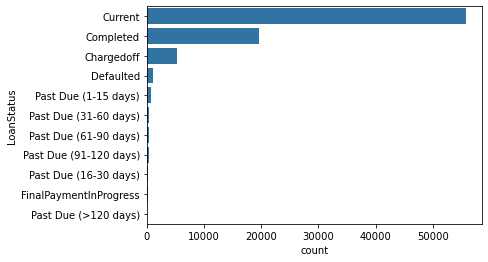

In [35]:
# Plotting loan status
color_base=sns.color_palette()[0]

# Ordering the categorical variable 
status_order=loan_sb.LoanStatus.value_counts().index

# Plot the chart
sns.countplot(data=loan_sb, y='LoanStatus', order=status_order, color=color_base);

> A lot of categories available, for clarity sake aggregation of data is needed. Which will be implemented on some variables

In [36]:
# Aggregate Past Due loans 
loan_sb['LoanStatus'] = loan_sb['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

loan_status_order = pd.api.types.CategoricalDtype(ordered = True, categories = status_dict)

loan_sb['LoanStatus'] = loan_sb['LoanStatus'].astype(loan_status_order)

> Now we proceed to present the aggregated variables.

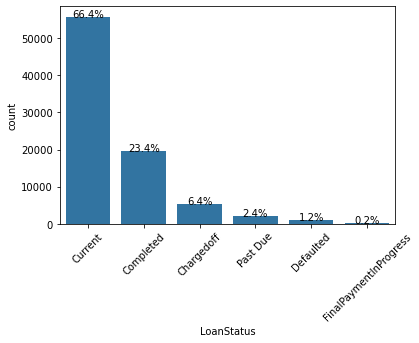

In [38]:
# Print the proportion below the bars 
loans_n=loan_sb['LoanStatus'].value_counts().sum()
status_count=loan_sb['LoanStatus'].value_counts()
status_order=status_count.index

base_color = sns.color_palette()[0]
sns.countplot(data=loan_sb, x='LoanStatus', color=base_color, order=status_order);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/loans_n)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

>About 89% of all Prosper loans are either current or completed which we can assume that they have good profiles. Also, about 8% of Prosper's loans were charged-off or defaulted. Moreover, the remaining 2.4% of loans has the status Past Due and was grouped under a single status: Past Due.

#### Let us look at the distribution of the BorrowerAPR

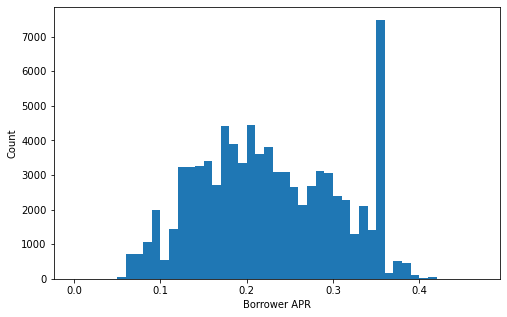

In [51]:
bins = np.arange(0, loan_sb.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sb, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Count')
plt.show()

> The visualization shown depicts that the BorrowerAPR is multimodal. A small peak at 0.10, and a large peak at 0.20. There is a very significant peak between 0.30 and 0.40. There are few loans after the 0.40 level, they may even be considered as outliers which we should confirm.

In [45]:
# Check loans with BorrowerAPR greater than 0.40
loan_sb[loan_sb.BorrowerAPR>0.40]

,LoanOriginalAmount,LoanStatus,BorrowerState,BorrowerAPR,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,EmploymentStatus,DebtToIncomeRatio,MonthlyLoanPayment,TotalTrades,Investors,year,month,day,time
2294,1200,Completed,UT,0.40243,3708.333333,HR,Professional,Employed,0.290000,0.00,19,20,2010,Apr,15,17:56:43.700000000
8750,1000,Completed,TX,0.41355,10500.000000,HR,Professional,Employed,0.270000,45.24,37,29,2010,Sept,24,16:21:20.063000000
9185,1000,Completed,TX,0.40315,3750.000000,HR,Truck Driver,Self-employed,0.258692,44.67,11,45,2010,Nov,25,10:30:13.733000000
9643,1000,Completed,NY,0.41355,2666.666667,HR,Other,Retired,0.258692,0.00,19,35,2010,Oct,08,13:13:33.723000000
10605,1000,Completed,WA,0.40679,1250.000000,E,Other,Other,0.258692,44.87,12,23,2010,Nov,15,13:22:21.383000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105889,1000,Chargedoff,NH,0.42395,2250.000000,HR,Administrative Assistant,Employed,0.080000,45.80,23,42,2010,Oct,22,14:07:40.683000000
111333,1000,Completed,NV,0.41355,7083.333333,HR,Computer Programmer,Employed,0.258692,45.24,6,19,2010,Dec,05,20:53:16.293000000
111407,1200,Completed,NH,0.40243,7500.000000,HR,Analyst,Employed,0.120000,54.28,34,36,2010,Nov,23,01:09:24.473000000
111463,1000,Completed,IL,0.41355,1833.333333,HR,Truck Driver,Full-time,0.258692,45.24,8,27,2010,Aug,02,19:44:56.867000000


> There are 74 borrowers with high APR, they have an EmploymentStatus, ProsperRating and StatedMonthlyIncome, therefore We cannot consider these people as outliers

#### Let us look at the distribution of the LoanOriginalAmount

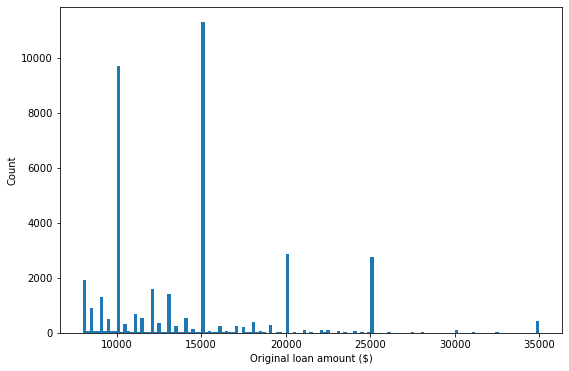

In [52]:
bins = np.arange(8000, loan_sb.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[9, 6])
plt.hist(data = loan_sb, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');
plt.ylabel('Count')
plt.show()

> Significant spikes can be seen at certain price levels(10k,15k,20k,25k), in this visualization, with the most significant spike being at 15k.

#### Let us look at the distribution of the StatedMonthlyIncome

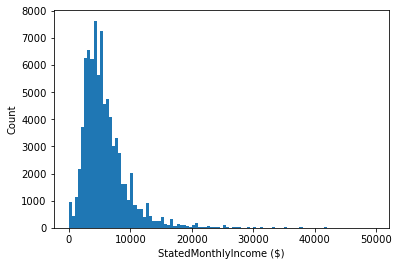

In [53]:
statedmonthlyincome_bins = np.arange(0, 50000, 500)
plt.hist(data = loan_sb, x = 'StatedMonthlyIncome', bins=statedmonthlyincome_bins);
plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('Count')
plt.show()

> The visualization shows that the distribution of the `StatedMonthlyIncome` is skewed to the right, with the `StatedMonthlyIncome` less than 25k and peaked above 7k.

In [57]:
# Get percent of borrowers whose stated monthly income greater than 25k
(loan_sb.StatedMonthlyIncome>25000).sum()/float(loan_sb.shape[0])

0.004881998523493129

In [58]:
# remove loans with StatedmMonthlyIncome greater than 25k, which are outliers
loan_sb = loan_sb[loan_sb.StatedMonthlyIncome<=25000]

In [60]:
(loan_sb.StatedMonthlyIncome>25000).sum()

0

#### Let us look at the distribution of the ProsperRating (Alpha)

In [61]:
# Convert ProsperRating into ordered categorical types
ProsperRating_order = ['HR','E','D','C','B','A','AA']
ordered_variable = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_order)
loan_sb['ProsperRating (Alpha)'] = loan_sb['ProsperRating (Alpha)'].astype(ordered_variable)

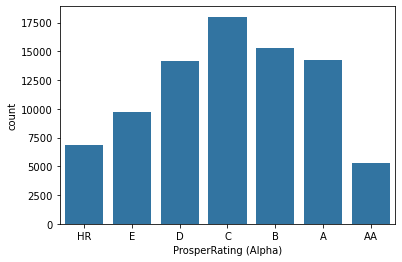

In [66]:
default_color = sns.color_palette()[0]
sns.countplot(data = loan_sb, x = 'ProsperRating (Alpha)', color = default_color)
plt.show()

> The ProperRatings with the most ratings are from D to A. 

#### Let us look at the distribution of the Employment Status

In [49]:
# Convert EmploymentStatus into ordered categorical types
employment_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_variable = pd.api.types.CategoricalDtype(ordered = True, categories = employment_order)
loan_sb['EmploymentStatus'] = loan_sb['EmploymentStatus'].astype(ordered_variable)

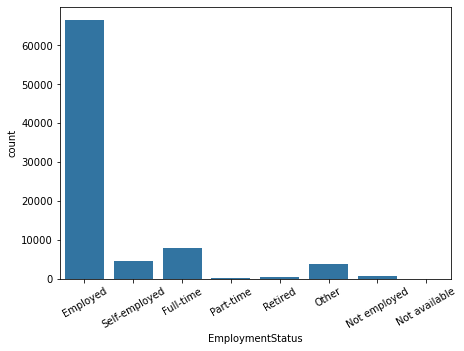

In [50]:
fig, ax = plt.subplots(figsize = [7,5])
default_color = sns.color_palette()[0]
sns.countplot(data = loan_sb, x = 'EmploymentStatus', color = default_color)
plt.xticks(rotation=30)
plt.show()

> The visualization shows that most borrowers are employed and full-time.

#### Let us look at the distribution of Occupation

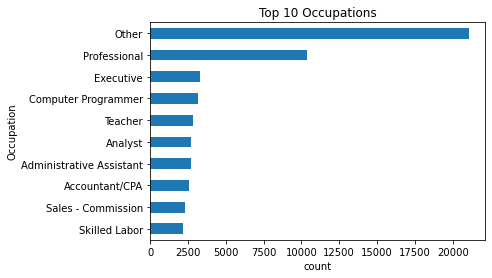

In [76]:
# a look at the top 10 occupations of borrowers

loan_sb['Occupation'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Occupations')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 15
plt.figsize=(15,12)

> This visualization depicts that most borrowers enter their occupation as `Others` or `Professional` probably because they want to keep their occupation private. The rest of the occupations seen do not have any significant value.

#### Let us look at the distribution of DebtToIncomeRatio

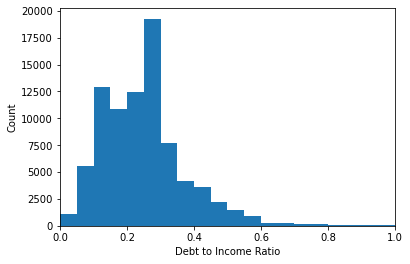

In [78]:
# Plot DebtToIncomeRatio
binsize = 0.05
bins = np.arange(0, loan_sb['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = loan_sb, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.xlim(0,1);

> The DebtToIncomeRatio shows if an individual has too debt for the amount of income. Which means, the lower the DebtToIncomeRatio signifies a balance between debt and income. From the visualization, it It appears from the figure above that most borrowers who applied for a loan have a debt to income ratio around 20% - 40%.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>* I looked at the distribution of `BorrowersAPR` looks multimodal. Most of the values are at the range of 0.05 and 0.4. There are no unusual points and no need to perform any transformations. 
>* Also the `StatedMonthlyIncome` distribution showed that it is skewed to the right which proved that many borrowers earned below 25k, so I removed the outliers above 25k ti better focus on the majority.
There was no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of my cleaning efforts and adjustment were on ordering factors to make more intuitive sense

## Bivariate Exploration
> To start off with, I want to look at the pairwise correlations present between features in the data. I will investigate the relationships between numerical variables to see if any particular pairs have strong correlations

In [80]:
numerical_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
categorical_vars = ['ProsperRating (Alpha)', 'EmploymentStatus']

#### Let us look at the Correlation plot

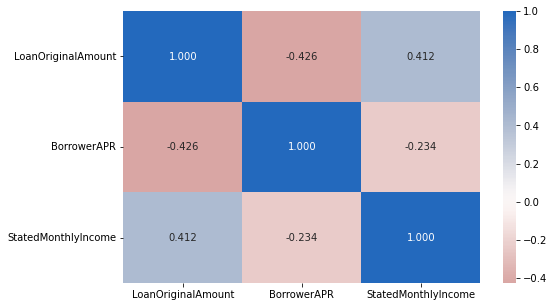

In [90]:
plt.figure(figsize = [8, 5])
sns.heatmap(loan_sb[numerical_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);
plt.yticks(rotation=0)
plt.show()

#### Let us look at a plot matrix that sample 10% of the total loans for the sake of clarity on how the  `BorrowerAPR`, `StatedMonthlyIncome`, `LoanOriginalAmount` correlates of the Numerical variables

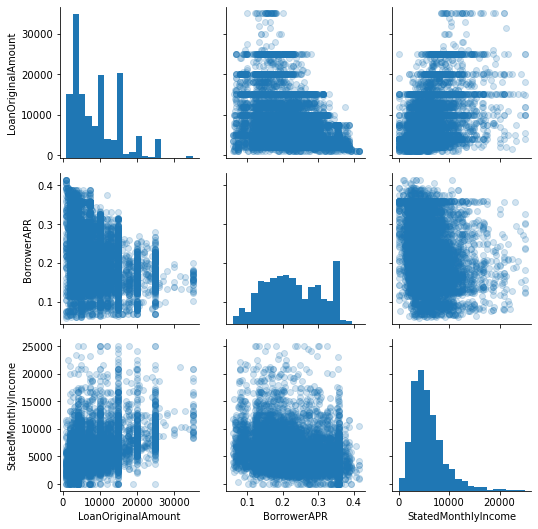

In [93]:
loan_sb_variable = loan_sb.sample(8398)
g = sns.PairGrid(data = loan_sb_variable.dropna(), vars = numerical_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

>* The correlation coefficient of BorrowerAPR and LoanOriginalAmount are negatively correlated which further confirms the hypothesis that the more the loan amount, the lower the BorrowerAPR.
>* The LoanOriginalAmount is positively correlated with the StatedMonthlyIncome, it makes sense since borrowers with more monthly income could loan more money.


#### Let us look at how the `BorrowerAPR`, `StatedMonthlyIncome`, `LoanOriginalAmount` correlates with the Categorical variables

In [103]:
# purpose to ignore warning signs
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<Figure size 720x720 with 0 Axes>

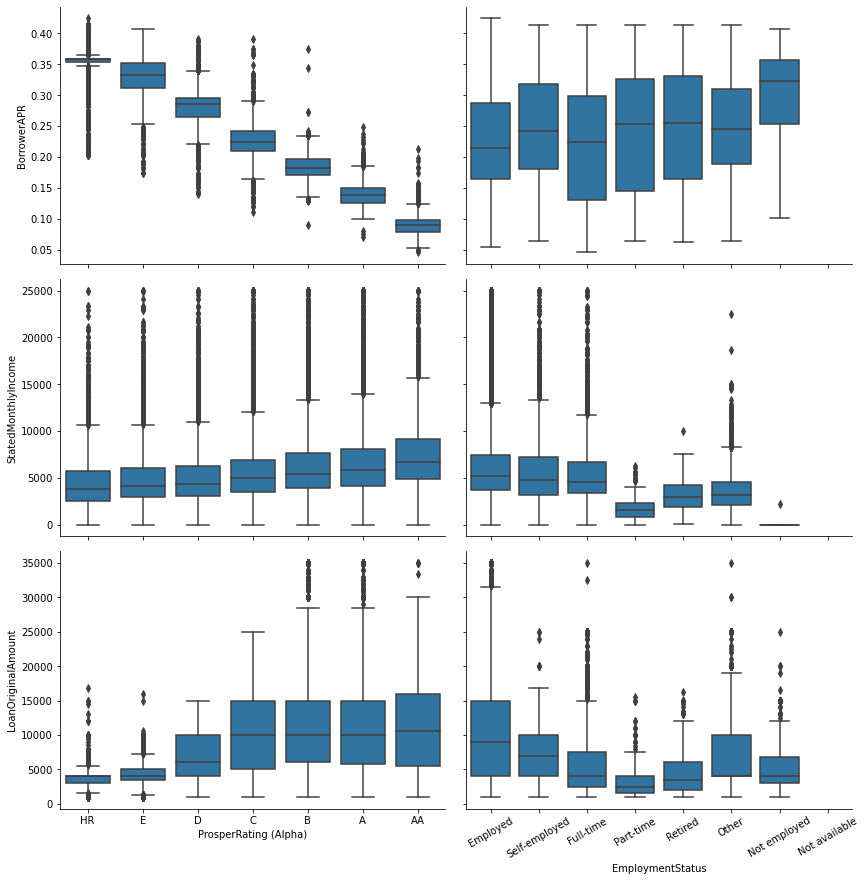

In [104]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs): 
    """ Quick hack for creating box plots with seaborn's PairGrid. """
#### Source: https://github.com/yduan004/communicate-data-loan-data-from-Prosper/blob/master/exploration.ipynb
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan_sb, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], x_vars = categorical_vars, height = 4, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);
plt.show()

>* This visualization shows the decrease in `BorrowerAPR` as the `ProsperRatings` increase, which shows the strong correlation between the `ProsperRating` and `BorrowerAPR`. 
>* It also shows that borrowers with High `StatedMonthlyIncome` have High `ProsperRatings` and Low `BorrowerAPR`
>* `Employed`, `Self-employed` and `Full-time` borrowers have more StatedMonthlyIncome and `LoanOriginalAmount` 


#### Let us look at the `EmploymentStatus` vs. `ProsperRating`  using different color palette

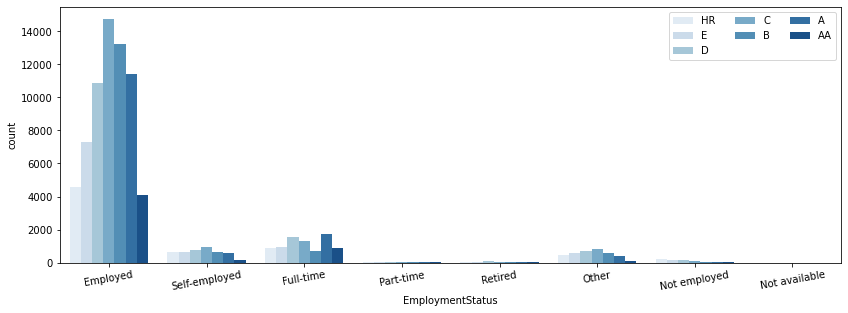

In [122]:
plt.figure(figsize = [14, 16])

ax = plt.subplot(3, 1, 3)
sns.countplot(data = loan_sb, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(loc = 1, ncol = 3); 
plt.xticks(rotation=10);



>`ProsperRating` grades borrowers on a scale of `AA`(the lowest risk) to `HR`(the highest risk). The visualization shows that the `Employed` and `Full-time` borrowers have more amount of Low Risk borrowers than any.

#### Let us look at the correlation between `Employment Status` and ``months`

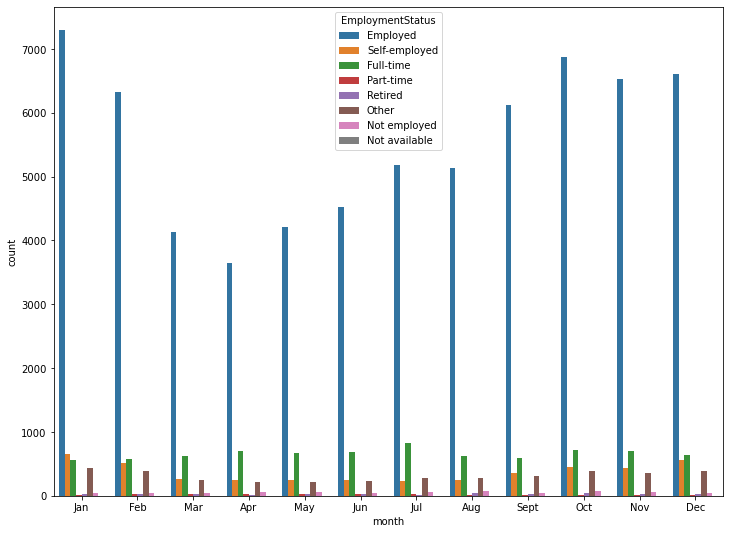

In [51]:
plt.figure(figsize = [12, 9])
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 
              'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
ordered_variable = pd.api.types.CategoricalDtype(ordered = True, categories = month_order)
loan_sb['month'] = loan_sb['month'].astype(ordered_variable)
sns.countplot(data = loan_sb.sort_values(by='month'), x = 'month', hue = 'EmploymentStatus')
plt.show()

> It can be seen that `Employed` and`Self-employed` borrowers, borrow more money in *January* but the `Full-time` borrowers are more in *July*

#### A look at the plot for the year vs LoanOriginalAmount

In [ ]:
plt.figure(figsize = [12])
sns.lineplot(data=loan_sb.sort_values(by='year'), x='year', y='LoanOriginalAmount', ci=None);

> It is clearly seen that total amount of Loan collected by borrowers over the years has been on a steady increase.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>* The decrease in `BorrowerAPR` as the `ProsperRatings` increase, which shows the strong correlation between the `ProsperRating` and `BorrowerAPR`. 
>* It also shows that borrowers with High `StatedMonthlyIncome` have High `ProsperRatings` and Low `BorrowerAPR`
>* `Employed`, `Self-employed` and `Full-time` borrowers have more StatedMonthlyIncome and `LoanOriginalAmount` 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>* `ProsperRating` grades borrowers on a scale of `AA`(the lowest risk) to `HR`(the highest risk). The visualization shows that the `Employed` and `Full-time` borrowers have more amount of Low Risk borrowers than any.
>* I checked the correlation between the EmploymentStatus and Months and found out that `Employed` and`Self-employed` borrowers, borrow more money in *January* but the `Full-time` borrowers are more in *July*
>* It is clearly seen that total amount of Loan collected by borrowers over the years has been on a steady increase.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how some of the the categorical variables play into the relationship between borrower APR and loan original amount.

####  A look on how `ProsperRating` have  effects on relationship of 
#### `BorrowerAPR` and `LoanOriginalAmount`

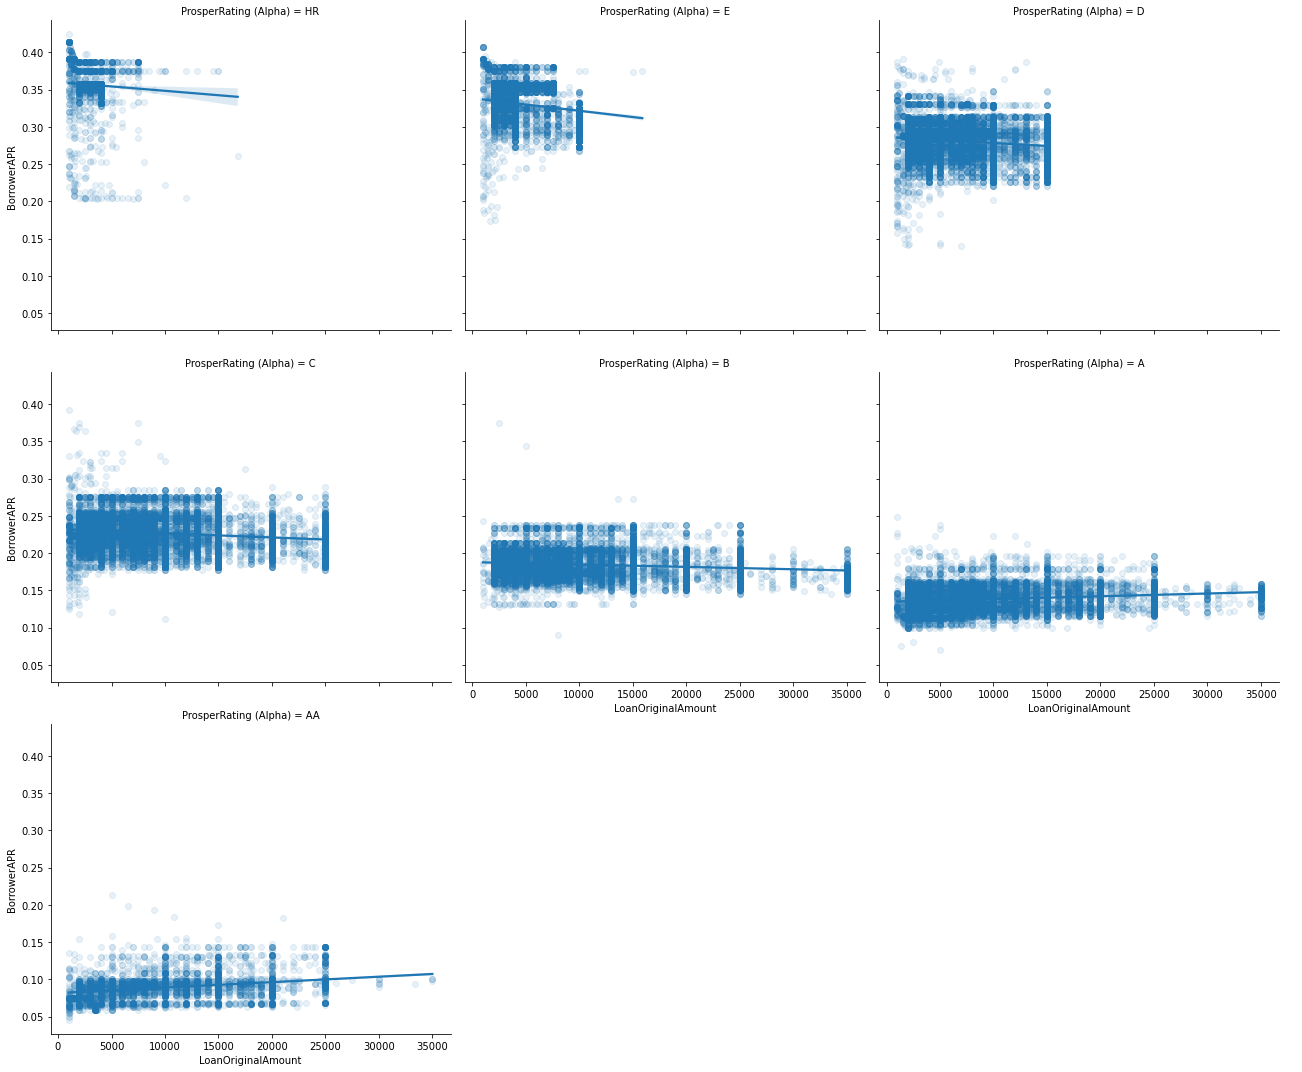

In [142]:
h=sns.FacetGrid(data=loan_sb, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=3)
h.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
h.add_legend();

>* The LoanOriginalAmount increases with higher ProsperRating. 
>* The BorrowerAPR decreases with higher ProsperRating. 
>* The relationship between BorroweAPR and LoanOriginalAmount turns from negative to slightly positive when the ProsperRating increases from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

####  A look on how `EmploymentStatus` have  effects on relationship of 
#### `BorrowerAPR` and `LoanOriginalAmount`

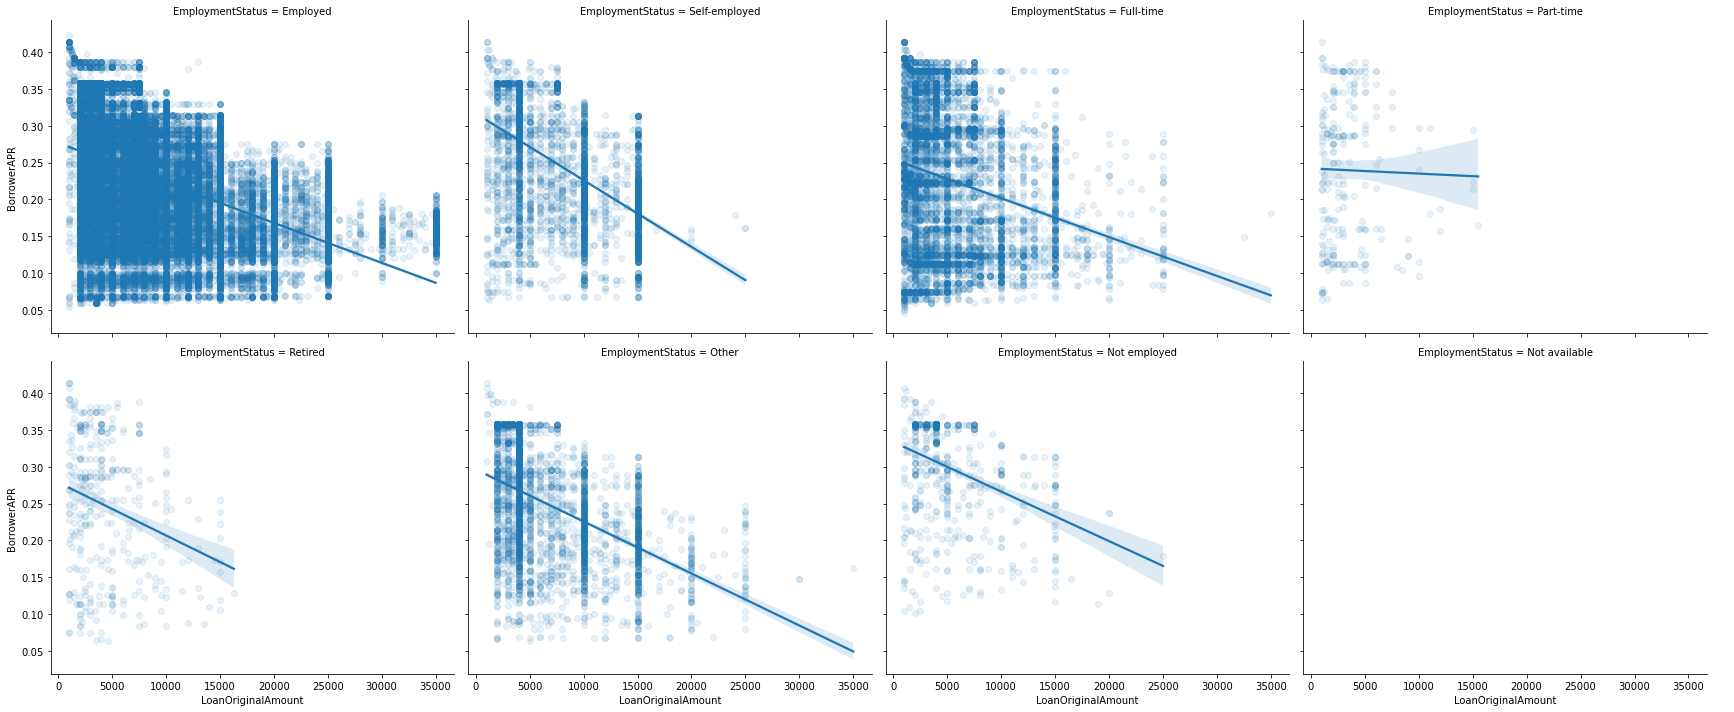

In [158]:
h=sns.FacetGrid(data=loan_sb, aspect=1.2, height=5, col='EmploymentStatus', col_wrap=4)
h.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
h.add_legend();

>* The LoanOriginalAmount increases with lower BorrowerAPR. 
>* The BorrowerAPR decreases in `Employed` borrowers, `Full-time` borrowers. 
>* The relationship between BorroweAPR and LoanOriginalAmount turns from negative to slightly positive when the borrowers are `Employed`. 

###  Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I furthered my analysis of the BorrowerAPR against LoanOriginalAmount by visualizing the effects of the Prosper rating using the multivariate exploration, it showed that:
>* The LoanOriginalAmount increases with higher ProsperRating. 
>* The BorrowerAPR decreases with higher ProsperRating. 
>* The relationship between BorroweAPR and LoanOriginalAmount turns from negative to slightly positive when the ProsperRating increases from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

### Were there any interesting or surprising interactions between features?

> A surprising interaction is found, was that:
>* The LoanOriginalAmount increases with lower BorrowerAPR. 
>* The BorrowerAPR decreases in `Employed` borrowers, `Full-time` borrowers. 
>* The relationship between BorroweAPR and LoanOriginalAmount turns from negative to slightly positive when the borrowers are `Employed`. 


In [ ]:
# save the cleaned dataset for explanatory data analysis
loan_sb.to_csv('LoanData_cleaned.csv')